In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
laptop = pd.read_csv("C:\\Users\\Asus\\Downloads\\laptop-price-predictor-regression-project-main\\laptop_data.csv")

In [3]:
laptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
laptop.duplicated().sum()

0

In [6]:
laptop.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
laptop.drop(['Unnamed: 0'],axis=1,inplace=True)

In [8]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
laptop['Ram']=laptop.Ram.str.replace('GB','')
laptop['Weight']=laptop.Weight.str.replace('kg','')

In [10]:
laptop.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
laptop['Ram']=laptop['Ram'].astype('int')
laptop['Weight']=laptop['Weight'].astype('float')

In [12]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


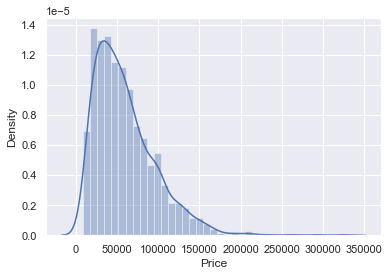

In [13]:
sns.distplot(laptop['Price'])
plt.show()

<AxesSubplot:>

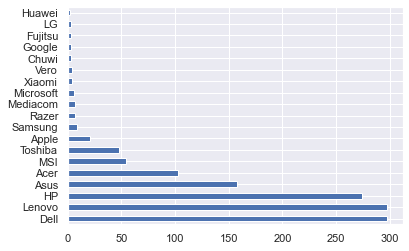

In [14]:
laptop.Company.value_counts().plot(kind='barh')

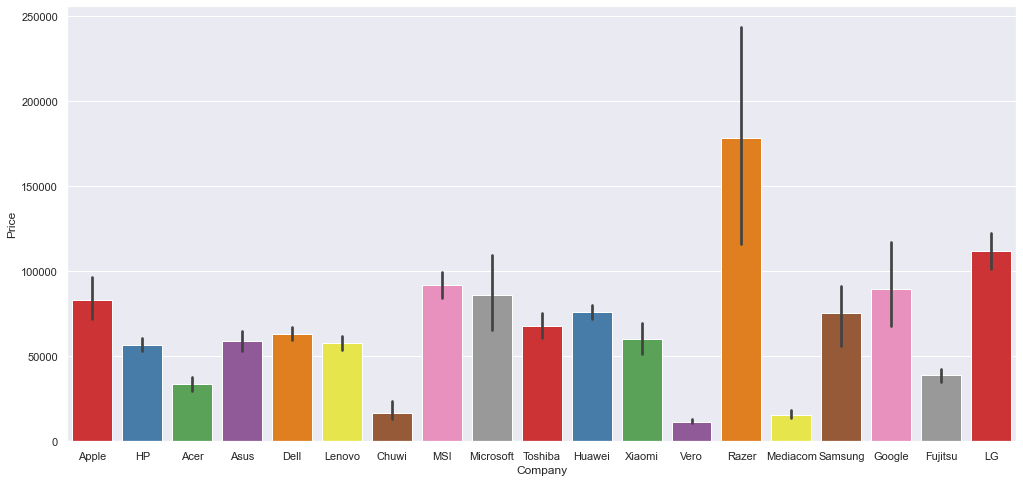

In [15]:
plt.figure(figsize=(17,8))
sns.barplot(x = 'Company',y = 'Price',data = laptop,palette = 'Set1')
plt.show()

<AxesSubplot:>

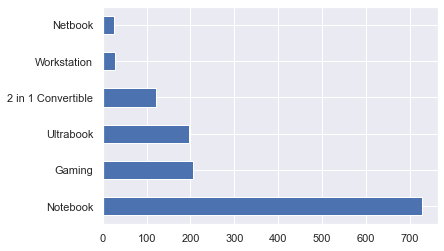

In [16]:
laptop.TypeName.value_counts().plot(kind = 'barh')

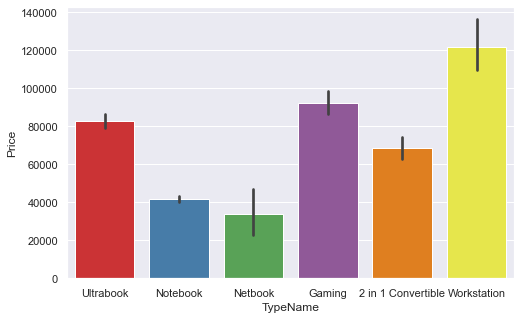

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x = 'TypeName',y = 'Price',data = laptop,palette = 'Set1')
plt.show()

In [18]:
laptop.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [19]:
laptop.corr()['Price']

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
Name: Price, dtype: float64

# In ScreenResolution ,their are some information
## 1. Touchscreen
## 2. ips panel
## 3. screen reselution

In [21]:
laptop['Touchscreen'] = laptop['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [22]:
laptop.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
598,Dell,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.34,88977.60,1
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,24455.52,0
1256,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,4.00,101232.00,0
882,Asus,Notebook,14.1,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.65,18541.44,0


In [23]:
laptop['IPS Panel'] = laptop['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [24]:
laptop.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
201,Lenovo,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.10,26267.04,0,0
1062,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics,Windows 10,2.25,29783.52,0,0
548,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,21152.16,0,0
815,Lenovo,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.32,99047.52,0,0


In [25]:
laptop['ScreenResolution'].str.split('x',n=1,expand =True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [26]:
laptop["XResolution"] = laptop["ScreenResolution"].apply(lambda x: x.split()[-1].split("x")[0])
laptop["YResolution"] = laptop["ScreenResolution"].apply(lambda x: x.split()[-1].split("x")[1])

In [27]:
laptop

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,XResolution,YResolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [28]:
laptop['XResolution'] = laptop.XResolution.astype('int')
laptop['YResolution'] = laptop.YResolution.astype('int')

In [29]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS Panel         1303 non-null   int64  
 13  XResolution       1303 non-null   int32  
 14  YResolution       1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [30]:
laptop.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS Panel      0.252208
XResolution    0.556529
YResolution    0.552809
Name: Price, dtype: float64

# we can see that price have good correlation with ram,their is multicorrlinearity in x and y resolution and inches is not usable, so make new column ppi(pixcel per inches)

In [32]:
laptop['ppi'] = (((laptop['XResolution']**2) + (laptop['YResolution']**2))**0.5)/laptop['Inches'].astype('float')

In [33]:
laptop.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS Panel      0.252208
XResolution    0.556529
YResolution    0.552809
ppi            0.473487
Name: Price, dtype: float64

In [34]:
# we have strong correlation with ppi so we use ppi insted of inches

In [35]:
laptop.drop(['ScreenResolution','XResolution','YResolution'],axis=1,inplace = True)

In [36]:
laptop.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [37]:
laptop['cpu name'] = laptop['Cpu'].apply(lambda x:" ".join(x.split() [0:3]))

In [38]:
laptop.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [39]:
def find_pros (text):
    if text== "Intel Core i7" or text=="Intel Core i5" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0] =="Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [40]:
laptop ['cpu brand'] = laptop['cpu name'].apply(find_pros)

In [41]:
laptop.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu name,cpu brand
848,HP,2 in 1 Convertible,13.3,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,121318.56,1,0,165.632118,Intel Core i5,Intel Core i5
1144,HP,2 in 1 Convertible,13.3,Intel Core i7 6600U 2.6GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.48,95850.72,1,0,220.842824,Intel Core i7,Intel Core i7
93,Dell,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,2.65,63669.60,0,0,141.211998,Intel Core i5,Intel Core i5
77,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02,45554.40,0,0,141.211998,Intel Core i7,Intel Core i7
427,Dell,Ultrabook,14.0,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Linux,1.60,58554.72,0,0,157.350512,Intel Core i7,Intel Core i7


<AxesSubplot:>

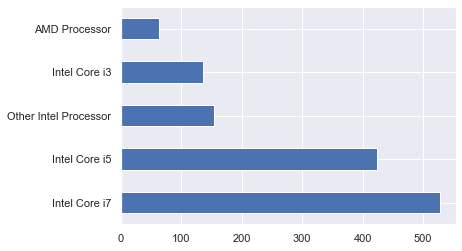

In [42]:
laptop['cpu brand'].value_counts().plot(kind  = 'barh')

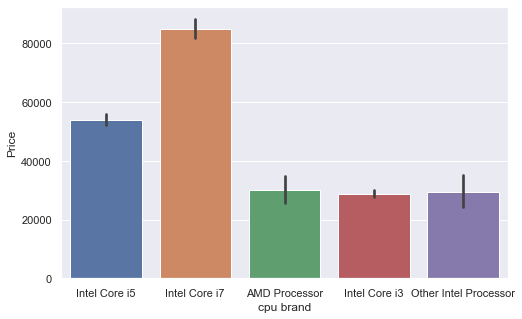

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(x ='cpu brand',y ='Price',data =laptop)
plt.show()

In [44]:
laptop.drop(['cpu name','Cpu'],axis =1,inplace =True)

<AxesSubplot:>

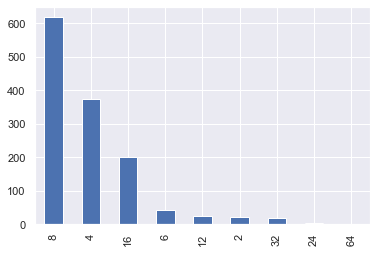

In [45]:
laptop['Ram'].value_counts().plot(kind ='bar')

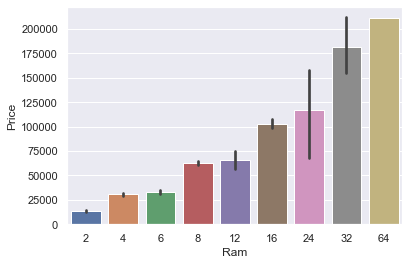

In [46]:
sns.barplot(x ='Ram',y ='Price',data = laptop)
plt.show()

In [47]:
# their are linear relationship b/w price and ram

In [48]:
laptop.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [49]:
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0','',regex=True)

In [50]:
laptop['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [51]:
new  = laptop['Memory'].str.split("+",n=1,expand=True)
new.sample(10)

,0,1
268,1TB HDD,None
651,1TB HDD,None
581,500GB HDD,None
658,128GB SSD,1TB HDD
448,256GB SSD,None
1099,128GB SSD,1TB HDD
1070,500GB HDD,None
94,256GB SSD,None
1264,500GB HDD,None
988,1TB HDD,None


In [52]:
laptop["first"] = new[0]
laptop["first"] = laptop['first'].str.strip()
laptop.head(3)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,first
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128GB SSD
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128GB Flash Storage
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256GB SSD


In [53]:
laptop['second'] = new[1]
laptop.sample(3)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,first,second
271,Asus,Gaming,17.3,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.2,82530.72,0,0,127.335675,AMD Processor,256GB SSD,1TB HDD
432,Lenovo,Notebook,14.0,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.7,31914.72,0,1,157.350512,Intel Core i3,128GB SSD,None
95,Acer,2 in 1 Convertible,13.3,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.5,45128.16,1,1,165.632118,Intel Core i5,256GB SSD,None


In [54]:
laptop['hdd1'] = laptop['first'].apply(lambda x:1 if 'HDD' in x else 0)
laptop['ssd1'] = laptop['first'].apply(lambda x:1 if 'SSD' in x else 0)
laptop['hybrid'] = laptop['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
laptop['flash storage'] = laptop['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

In [55]:
laptop.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,first,second,hdd1,ssd1,hybrid,flash storage
83,Lenovo,Notebook,15.6,4,128GB SSD,AMD R4 Graphics,Windows 10,2.2,21258.7200,0,0,141.211998,AMD Processor,128GB SSD,None,0,1,0,0
930,Lenovo,Notebook,15.6,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.2,16463.5200,0,0,100.454670,Other Intel Processor,1TB HDD,None,1,0,0,0
644,Acer,Notebook,15.6,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.4,23976.0000,0,0,100.454670,Intel Core i3,500GB HDD,None,1,0,0,0
919,MSI,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2,59668.8048,0,0,141.211998,Intel Core i5,128GB SSD,1TB HDD,0,1,0,0
367,Lenovo,Gaming,15.6,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.4,43103.5200,0,1,141.211998,Intel Core i5,128GB SSD,1TB HDD,0,1,0,0


In [56]:
laptop['first'] = laptop['first'].str.replace(r'\D','')

C:\Users\Asus\AppData\Local\Temp/ipykernel_27528/3348905393.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['first'] = laptop['first'].str.replace(r'\D','')


In [57]:
laptop.sample(4)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,first,second,hdd1,ssd1,hybrid,flash storage
363,HP,Notebook,15.6,8,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,34045.92,0,0,141.211998,Intel Core i5,1,None,1,0,0,0
306,HP,2 in 1 Convertible,13.3,16,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,105228.00,1,0,165.632118,Intel Core i7,256,None,0,1,0,0
707,Lenovo,Workstation,15.6,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18,98834.40,0,0,141.211998,Intel Core i7,512,None,0,1,0,0
681,Asus,Notebook,15.6,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.86,22324.32,0,0,100.454670,Other Intel Processor,128,None,0,1,0,0


In [58]:
laptop['second'] = laptop['second'].fillna('0')
laptop.second

0       0
1       0
2       0
3       0
4       0
       ..
1298    0
1299    0
1300    0
1301    0
1302    0
Name: second, Length: 1303, dtype: object

In [59]:
laptop['layer2hdd'] = laptop['second'].apply(lambda x:1 if 'HDD' in x else 0)
laptop['ssd2'] = laptop['second'].apply(lambda x:1 if 'SSD' in x else 0)
laptop['hybrid2'] = laptop['second'].apply(lambda x:1 if 'Hybrid' in x else 0)
laptop['flash storage2'] = laptop['second'].apply(lambda x:1 if 'Flash Storage' in x else 0)

In [60]:
laptop['second'] = laptop['second'].str.replace(r'\D','')

C:\Users\Asus\AppData\Local\Temp/ipykernel_27528/2120658773.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  laptop['second'] = laptop['second'].str.replace(r'\D','')


In [61]:
laptop['first'] = laptop['first'].astype(int)
laptop['second'] = laptop['second'].astype(int)

In [62]:
laptop['HDD'] = (laptop['first']*laptop['hdd1'] + laptop['second']*laptop['layer2hdd'])
laptop['SSD'] = (laptop['first']*laptop['ssd1'] + laptop['second']*laptop['ssd2'])
laptop['Hybrid'] = (laptop['first']*laptop['hybrid'] + laptop['second']*laptop['hybrid2'])
laptop['Flash Storage'] = (laptop['first']*laptop['flash storage'] + laptop['second']*laptop['flash storage2'])

In [63]:
laptop.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,hybrid,flash storage,layer2hdd,ssd2,hybrid2,flash storage2,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,...,0,0,0,0,0,0,0,256,0,0


In [64]:
# drop column
laptop.drop(['hybrid','ssd1','hdd1','layer2hdd','ssd2','hybrid2','flash storage','flash storage2','first','second'],axis = 1,inplace =True)

In [65]:
laptop.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,HDD,SSD,Hybrid,Flash Storage
212,HP,Notebook,15.6,4,500GB HDD,Intel HD Graphics 520,No OS,2.10,18594.72,0,0,141.211998,Intel Core i3,500,0,0,0
476,Dell,Workstation,15.6,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,128298.24,0,0,141.211998,Intel Core i7,0,256,0,0
204,Dell,Workstation,15.6,16,256GB SSD + 1TB HDD,Nvidia Quadro M1200,Windows 10,2.80,162770.40,0,0,282.423996,Other Intel Processor,1,256,0,0
36,Acer,Notebook,15.6,4,1TB HDD,Intel HD Graphics 620,Linux,2.10,19553.76,0,0,100.454670,Intel Core i3,1,0,0,0
796,Asus,Notebook,14.0,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.63,15930.72,0,0,111.935204,Other Intel Processor,0,0,0,32


In [66]:
laptop.drop(['Memory'],axis =1,inplace = True)

In [67]:
laptop

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,14.0,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,15.6,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1,0,0,0


In [68]:
laptop.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS Panel        0.252208
ppi              0.473487
HDD             -0.234901
SSD              0.547358
Hybrid          -0.004769
Flash Storage   -0.040511
Name: Price, dtype: float64

In [69]:
laptop.drop(['Inches','Hybrid','Flash Storage'],inplace = True, axis =1)

In [70]:
laptop

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1,0


In [71]:
laptop.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [72]:
laptop['Gpu brand'] =laptop['Gpu'].apply(lambda x: x.split()[0])

In [73]:
laptop

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1,0,AMD


In [74]:
laptop.drop(['Gpu'],axis = True,inplace =True)

In [75]:
laptop['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [76]:
laptop = laptop[laptop['Gpu brand'] != 'ARM']

In [77]:
laptop['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

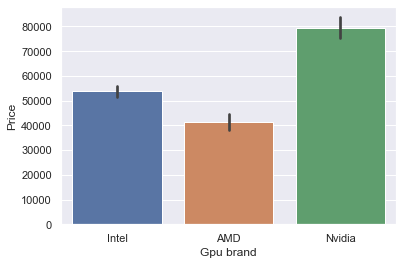

In [78]:
sns.barplot(x ='Gpu brand',y ='Price',data =laptop)
plt.show()

In [79]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [80]:
def cha_op(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
            return 'Mac OS'
    else:
        return 'No OS/Linux/Chrome OS/Android'
            

In [81]:
laptop['OS'] = laptop['OpSys'].apply(cha_op)

C:\Users\Asus\AppData\Local\Temp/ipykernel_27528/1399884593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop['OS'] = laptop['OpSys'].apply(cha_op)


In [82]:
laptop.drop(['OpSys'],axis=1,inplace=True)

C:\Users\Asus\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS Panel,ppi,cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac OS
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac OS
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,No OS/Linux/Chrome OS/Android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac OS
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac OS


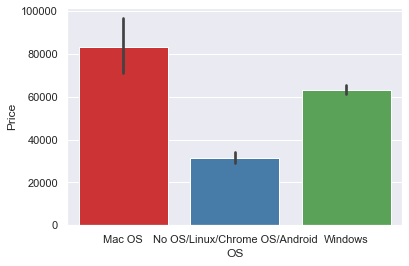

In [84]:
sns.barplot(x='OS',y='Price',data=laptop,palette = 'Set1')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


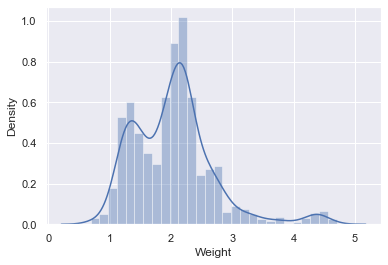

In [85]:
sns.distplot(laptop['Weight'])
plt.show()

In [86]:
laptop.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS Panel      0.253320
ppi            0.475368
HDD           -0.235127
SSD            0.547147
Name: Price, dtype: float64

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


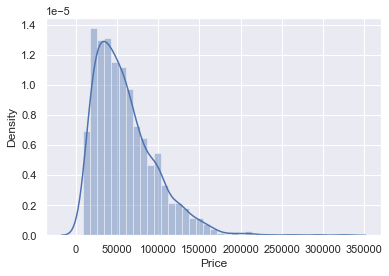

In [87]:
sns.distplot(laptop['Price'])
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


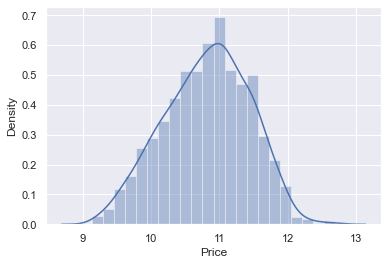

In [100]:
# distribution of price is skwed .so apply log transformtion
sns.distplot(np.log(laptop['Price']))
plt.show()

In [89]:
x = laptop.drop(columns=['Price'])
y = np.log(laptop['Price'])

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=2)

In [91]:
#to convert categoricl column importing column transformer

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [94]:
y_pred = pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8074506018048996
MAE 0.21225039523854794


In [95]:
np.exp(0.21)

1.2336780599567432

# Ridge 

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8117542717942825
MAE 0.2120501530662362


# Lasso

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8064891585365471
MAE 0.21376824771036776


# DecisionTree

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8410338877916625
MAE 0.18410684927817286


# RandomForest

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print('r2_score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

r2_score 0.8837091423539605
MAE 0.15814169244999657
